In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt



In [4]:
data=pd.read_csv("C:\\Users\\kardi\\Downloads\\Iris.csv")

In [5]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
le=LabelEncoder()

In [22]:
y=y.apply(le.fit_transform)
print(y)



ValueError: bad input shape ()

In [10]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0,8,14,4,1,0
1,1,6,9,4,1,0
2,2,4,11,3,1,0
3,3,3,10,5,1,0
4,4,7,15,4,1,0
...,...,...,...,...,...,...
145,145,24,9,28,19,2
146,146,20,4,26,15,2
147,147,22,9,28,16,2
148,148,19,13,30,19,2


In [17]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [18]:
x

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0,8,14,4,1
1,1,6,9,4,1
2,2,4,11,3,1
3,3,3,10,5,1
4,4,7,15,4,1
...,...,...,...,...,...
145,145,24,9,28,19
146,146,20,4,26,15
147,147,22,9,28,16
148,148,19,13,30,19


In [19]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

In [25]:
x_train.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
137,137,21,10,31,14
84,84,11,9,21,11
27,27,9,14,5,1
127,127,18,9,25,14
132,132,21,7,32,18


In [26]:
y_train.head()

137    2
84     1
27     0
127    2
132    2
Name: Species, dtype: int32

In [35]:
from sklearn.tree import DecisionTreeClassifier
regressor=DecisionTreeClassifier(max_depth=5)
regressor.fit(x_train,y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [28]:
y_train_pred=regressor.predict(x_train)
y_test_pred=regressor.predict(x_test)


In [29]:
y_train_pred

array([2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0, 0, 1, 2, 2, 2, 2, 1, 2,
       1, 1, 2, 2, 2, 2, 1, 2, 1, 0, 2, 1, 1, 1, 1, 2, 0, 0, 2, 1, 0, 0,
       1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2,
       0, 0, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 1, 2, 1,
       0, 2, 0, 2, 0, 0, 2, 0, 2, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 0, 1,
       1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

Model Performance

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [31]:
confusion_matrix(y_test,y_test_pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  1,  5]], dtype=int64)

In [38]:
confusion_matrix(y_train,y_train_pred)

array([[39,  0,  0],
       [ 0, 37,  0],
       [ 0,  0, 44]], dtype=int64)

In [37]:
accuracy_score(y_test,y_test_pred)

0.9666666666666667

Plotting decision tree

In [ ]:
conda install pydotplus

In [ ]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

In [ ]:
dot_data=StringIO()

export_graphviz(regressor,out_file=dot_data,filled=True,rounded=True,special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree.png')


##Bagging

In [32]:
from sklearn import tree
clftree=tree.DecisionTreeClassifier()

Text(0.5, 1.0, 'Decision Tree')

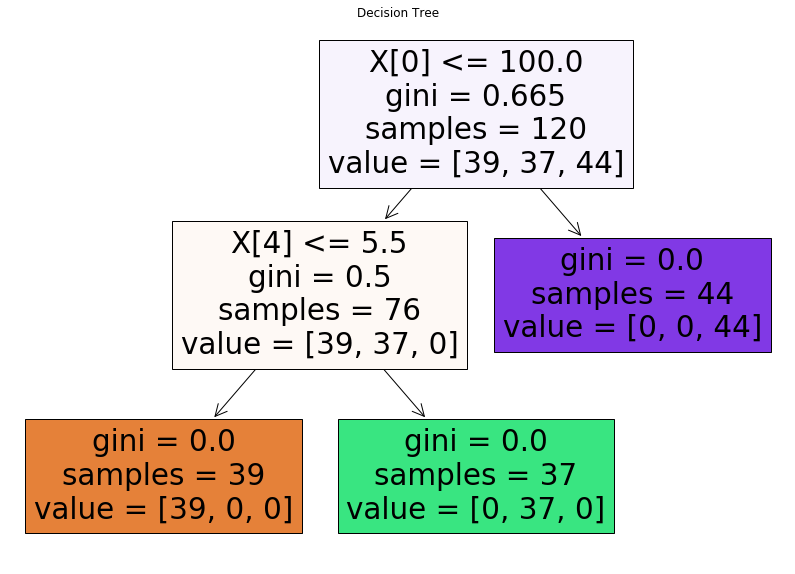

In [36]:
from sklearn import tree
plt.figure(figsize=(14,10))
tree.plot_tree(regressor,filled=True)
plt.title("Decision Tree")